In [92]:
import os
import sys; sys.path.append('..')
import numpy as np
import torch
from torch import Tensor
from scipy.stats import normaltest
import matplotlib.pyplot as plt

dataset = 'cub'
datasets = ['SUN', 'CUB', 'AwA1', 'AwA2', 'aPY']

In [93]:
load_attrs = lambda d: np.load(f'/ibex/scratch/skoroki/datasets/{d.lower()}_feats/attrs.npy')
statistics, pvalues = zip(*[normaltest(load_attrs(d), axis=0) for d in datasets])

In [94]:
def plot_boxplots(data, ylabel, filename, **kwargs):
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize=(7, 5))
    bp = plt.boxplot(data, patch_artist=True, **kwargs);

    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set(facecolor = 'lightskyblue')

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='dodgerblue', linewidth=1)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

    plt.grid();
    plt.xlabel('Dataset')
    plt.ylabel(ylabel)
    plt.xticks(np.arange(len(datasets)) + 1, datasets);
    # plt.legend()
    plt.savefig(f'../plots/{filename}.pdf', bbox_inches = 'tight', pad_inches = 0)

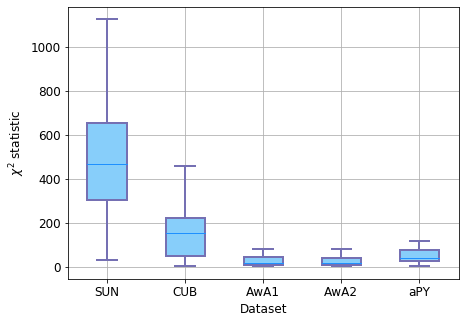

In [95]:
plot_boxplots(statistics, '$\chi^2$ statistic', 'chi_squared_stats', showfliers=False)

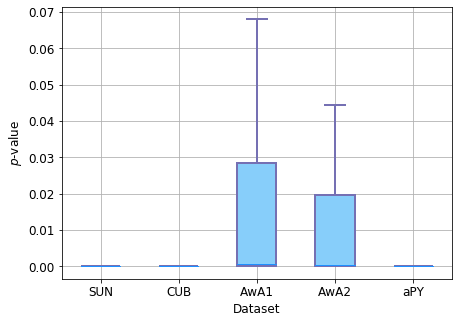

In [97]:
plot_boxplots(pvalues, '$p$-value', 'p_values', showfliers=False)

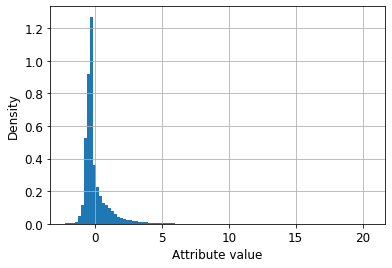

In [143]:
attrs = load_attrs('sun')
attrs = (attrs  - attrs.mean(axis=0, keepdims=True)) / attrs.std(axis=0, keepdims=True)
plt.hist(np.ravel(attrs), bins=100, density=True);
plt.grid()
plt.xlabel('Attribute value')
plt.ylabel('Density')
plt.savefig('../plots/sun-attrs-hist.pdf', bbox_inches = 'tight', pad_inches = 0)

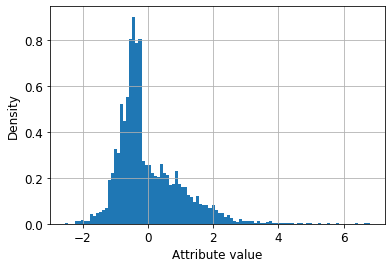

In [145]:
attrs = load_attrs('awa2')
attrs = (attrs  - attrs.mean(axis=0, keepdims=True)) / attrs.std(axis=0, keepdims=True)
plt.hist(np.ravel(attrs), bins=100, density=True);
plt.grid()
plt.xlabel('Attribute value')
plt.ylabel('Density')
plt.savefig('../plots/awa2-attrs-hist.pdf', bbox_inches = 'tight', pad_inches = 0)

In [51]:
def compute_covariance(feats: Tensor) -> Tensor:
    """
    Computes empirical covariance matrix for a batch of feature vectors
    """
    assert feats.ndim == 2

    feats -= feats.mean(dim=0)
    cov_unscaled = feats.t() @ feats # [feat_dim, feat_dim]
    cov = cov_unscaled / (feats.size(0) - 1)

    return cov

cov = compute_covariance(attrs)

In [124]:
attrs = [load_attrs(d) for d in datasets]
compute_abs_corrs = lambda a: np.abs(np.corrcoef(a.T))[np.triu_indices(a.shape[1], k=1)]
abs_corrs = [compute_abs_corrs(a) for a in attrs]

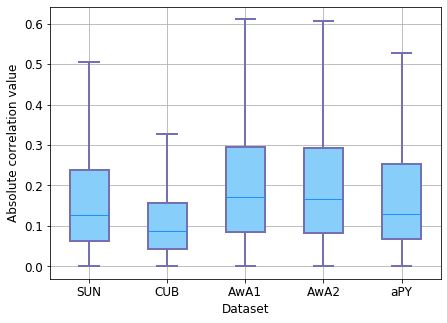

In [129]:
plot_boxplots(abs_corrs, 'Absolute correlation value', 'abs_corrs', showfliers=False)